In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("white")

In [23]:
cpi = pd.read_csv ('../../dataset/Indicators/cpi_yoy.csv', encoding='unicode_escape')

In [24]:
cpi.head()

,time,close
0,1914-12-01T00:00:00Z,1.0
1,1915-01-01T00:00:00Z,1.0
2,1915-02-01T00:00:00Z,1.0
3,1915-03-01T00:00:00Z,0.0
4,1915-04-01T00:00:00Z,2.0


In [25]:
def cleaned_indicator(df): 
    df['time'] = df['time'].str.extract('(\d{4}-\d{2}-\d{2})', expand=True)
    df['time'] = pd.to_datetime(df["time"])
    df.set_index('time', inplace=True)
    df= df.reindex(pd.date_range(start=df.index.min(),
                                                  end=df.index.max(),
                                                  freq='1D'))
    df.interpolate(method='pad', inplace=True)
    df.index.names = ['Year']
    df = df[(df.index >= '1976-06-01') & (df.index <= '2022-11-02')]
    return df

In [26]:
cpi = cleaned_indicator(cpi)



In [27]:
def cpi_visualization(): 
    plt.plot(cpi, color= 'b')
    plt.title('Consumer Price Index (CPI) YoY', fontsize= 20)
    plt.xlabel('Date', fontsize= 20)
    plt.ylabel('CPI YoY (%)', fontsize= 20)
    plt.style.use('seaborn')
    return plt.show()

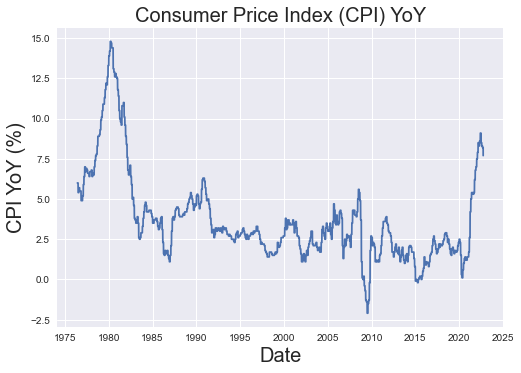

In [29]:
cpi_visualization()